In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.utils import load_img


ImportError: DLL load failed while importing _rolling_ball_cy: %1 is not a valid Win32 application.

In [ ]:
# import os
# for dirname, _, filenames in os.walk('D:\CV\Augmented_data'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

In [18]:
DATADIR = 'D:\CVmain'
CATEGORIES = ['backhand','forehand']
IMG_SIZE=150

In [19]:

#     for category in CATEGORIES:
#         data_gen = ImageDataGenerator( 

#         rotation_range = 40, 

#         shear_range = 0.2, 

#         zoom_range = 0.2, 

#         horizontal_flip = True, 

#         brightness_range = (0.5, 1.5)) 

#         path=os.path.join(DATADIR, category)
#         class_num=CATEGORIES.index(category)
#         for img in os.listdir(path):
#                 img_array=load_img(os.path.join(path,img), target_size=(150,150))
#                 new_array=img_to_array(img_array)
#                 new_array = new_array.reshape((1,) + new_array.shape)
#                 count = 0
#                 for batch in data_gen.flow( new_array, batch_size = 1, save_to_dir = r'D:\CV\Augmented_data\\' + category,  save_prefix=category, save_format='png'):
#                     count += 1
#                     if count >= 10:
#                         break

# create_training_data()      

In [20]:

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#         img_array=load_img(os.path.join(path,img), target_size=(150, 150))
        fd, img_array = hog(img_array, orientations=9, pixels_per_cell=(2, 2),
                	cells_per_block=(5, 5), visualize=True, multichannel=True)
        plt.imshow(img_array)
        plt.show()
        break
    break

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\CVmain\\backhand'

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                fd, new_array = hog(new_array, orientations=9, pixels_per_cell=(2, 2),
                        cells_per_block=(5, 5), visualize=True, multichannel=True)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()      

In [114]:
print(len(training_data))

1038


In [115]:
lenofimage = len(training_data)

In [116]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [117]:
X.shape

(1038, 22500)

In [118]:
X = X/255.0

In [119]:
X[1]

array([0.        , 0.        , 0.        , ..., 0.0964683 , 0.        ,
       0.00588235])

In [120]:
y=np.array(y)

In [121]:
y.shape

(1038,)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# SVM

In [123]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [124]:
y2 = svc.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6115384615384616


In [126]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.6115384615384616')

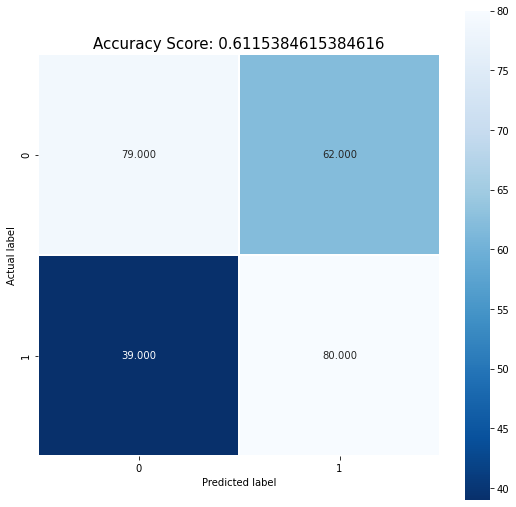

In [127]:
cm = confusion_matrix(y_test,y2)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y2))
plt.title(all_sample_title,size=15)

In [128]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.67      0.56      0.61       141
           1       0.56      0.67      0.61       119

    accuracy                           0.61       260
   macro avg       0.62      0.62      0.61       260
weighted avg       0.62      0.61      0.61       260



In [129]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [130]:
result

,original,predicted
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
255,0,0
256,1,0
257,0,0
258,1,1


# KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

In [132]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [133]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [134]:
# predict for one observation
knn.predict(X_test[0].reshape(1,-1))

array([1])

In [135]:
# predict for multiple observation (images) at once
knn.predict(X_test[0:10])

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [136]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [137]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.712


Text(0.5, 1.0, 'Accuracy Score: 0.7115384615384616')

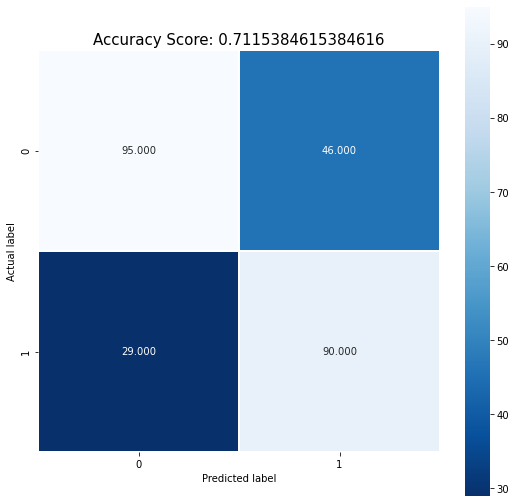

In [138]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [139]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.77      0.67      0.72       141
           1       0.66      0.76      0.71       119

    accuracy                           0.71       260
   macro avg       0.71      0.72      0.71       260
weighted avg       0.72      0.71      0.71       260



In [140]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [141]:
result

,original,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
255,0,0
256,1,0
257,0,0
258,1,1


# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
clf = RandomForestClassifier(n_estimators = 500, 
                             max_depth = 4, 
                             max_features = 3, 
                             bootstrap = True, 
                             random_state = 18).fit(X_train, y_train)

In [144]:
# Create our predictions
prediction = clf.predict(X_test)
# Display accuracy score
accuracy_score(y_test, prediction)

0.5538461538461539

Text(0.5, 1.0, 'Accuracy Score: 0.5538461538461539')

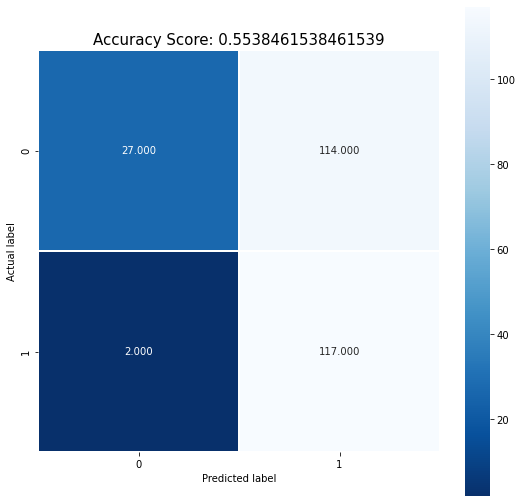

In [145]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,prediction))
plt.title(all_sample_title,size=15)

In [146]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,prediction))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.93      0.19      0.32       141
           1       0.51      0.98      0.67       119

    accuracy                           0.55       260
   macro avg       0.72      0.59      0.49       260
weighted avg       0.74      0.55      0.48       260



In [147]:
result = pd.DataFrame({'original' : y_test,'predicted' : prediction})

In [148]:
result

,original,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
255,0,1
256,1,1
257,0,0
258,1,1


# K-Means

In [149]:
from sklearn.cluster import KMeans

In [150]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(X_train,y_train)

In [151]:
# predict for one observation
kmeans.predict(X_test[0].reshape(1,-1))

array([1])

In [152]:
# predict for multiple observation (images) at once
kmeans.predict(X_test[0:10])

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [153]:
# make prediction on entire test data
predictions = kmeans.predict(X_test)

In [154]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

KMeans Accuracy: 0.538


Text(0.5, 1.0, 'Accuracy Score: 0.5384615384615384')

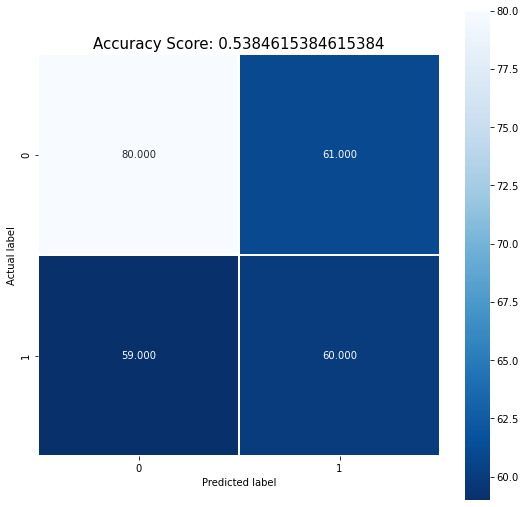

In [155]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [156]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.58      0.57      0.57       141
           1       0.50      0.50      0.50       119

    accuracy                           0.54       260
   macro avg       0.54      0.54      0.54       260
weighted avg       0.54      0.54      0.54       260



In [90]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [91]:
result

,original,predicted
0,0,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
255,1,0
256,1,1
257,1,1
258,1,0
